<a href="https://colab.research.google.com/github/PariaGhaheri/Classification_of_Parkinson_Disease/blob/main/SHAP_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [1]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import xgboost
import shap
import pandas as pd
from xgboost import XGBClassifier
import matplotlib.pyplot as pl

# Reading the dataset and making classification

In [3]:
dataset = pd.read_csv('ReplicatedAcousticFeatures_PD.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
params={'eta' :0.001 ,'gamma':0 , 'n_estimators' :94}
model = XGBClassifier(**params)

# Visualize the  prediction's explanation using SHAP

In [4]:
#explain the model's predictions
modelshap = model.fit(X,y)
explainer = shap.Explainer( modelshap ,  feature_names = ['HNR05','HNR15','HNR25','HNR35','HNR38','GNE','MFCC0'	,'MFCC1',	'MFCC2','MFCC3','MFCC4','MFCC5','MFCC6','MFCC7','MFCC8','MFCC9','MFCC10','MFCC11','MFCC12','Delta0','Delta1','Delta2','Delta3','Delta4','Delta5','Delta6','Delta7','Delta8','Delta9','Delta10','Delta11','Delta12'])
shap_values = explainer(X)

# SHAP bar plot

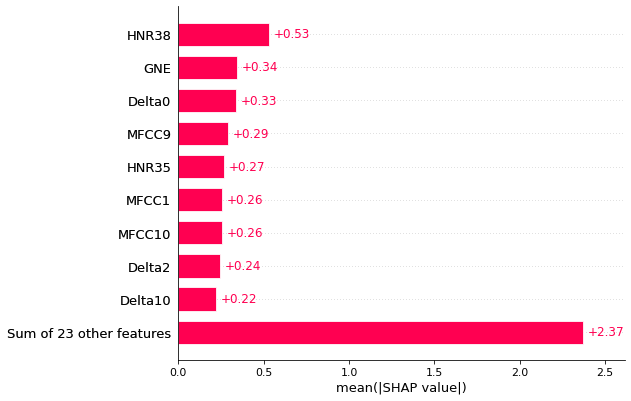

In [5]:
shap.initjs()
shap.plots.bar(shap_values , show=False)
pl.savefig('bar.svg', bbox_inches='tight')
pl.show()

# SHAP beeswarm plot

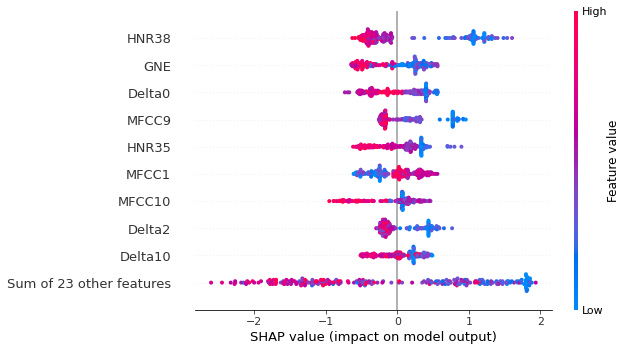

In [6]:
shap.plots.beeswarm(shap_values , show=False)
pl.savefig('beeswarm.svg', bbox_inches='tight')
pl.show()